In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:\\RUSHIKESH\\EXCEL-R\\PROJECTS\\Gold-price\\Datasets\\GoldPrice.csv",index_col=0, parse_dates=True)

In [3]:
data

,Gold_Price
Date,
2020-03-04,38782
2020-03-05,39246
2020-03-06,40061
2020-03-09,39971
2020-03-10,39570
...,...
2022-02-28,46420
2022-03-01,46715
2022-03-02,47102


In [4]:
data.dtypes

Gold_Price    int64
dtype: object

## EDA :-

- as the data is not given regular we have make it regular using resample technique :-

In [5]:
updated_data = data.resample('D').mean()     # this will create a null values for missing dates 

In [6]:
regular_data = updated_data.interpolate(method='linear')

# this will fill the null values with appropriate values

In [7]:
regular_data

,Gold_Price
Date,
2020-03-04,38782.0
2020-03-05,39246.0
2020-03-06,40061.0
2020-03-07,40031.0
2020-03-08,40001.0
...,...
2022-02-28,46420.0
2022-03-01,46715.0
2022-03-02,47102.0


In [8]:
regular_data.describe()

,Gold_Price
count,731.000000
mean,43302.299590
std,1972.144067
min,35643.000000
25%,42305.333333
50%,43292.000000
75%,44446.333333
max,49968.000000


In [9]:
regular_data.isnull().sum()

Gold_Price    0
dtype: int64

### Visualization :-

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Price')

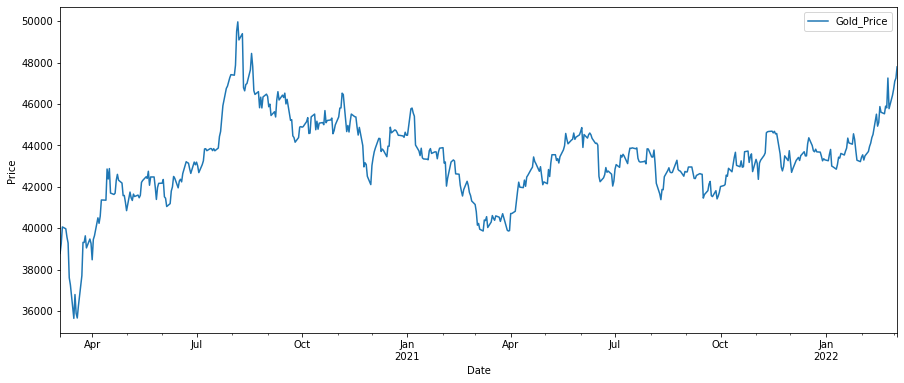

In [11]:
regular_data.plot(figsize=(15,6))
plt.xlabel("Date")
plt.ylabel("Price")


- from above line-plot we can see that our gold-price with given time period has constant Trend with non Seasonality.

<AxesSubplot:ylabel='Density'>

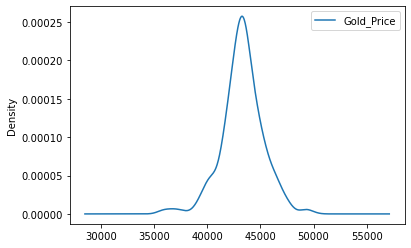

In [12]:
regular_data.plot(kind='kde')

(array([  8.,   5.,  21.,  55., 172., 263., 134.,  53.,  14.,   6.]),
 array([35643. , 37075.5, 38508. , 39940.5, 41373. , 42805.5, 44238. ,
        45670.5, 47103. , 48535.5, 49968. ]),
 <BarContainer object of 10 artists>)

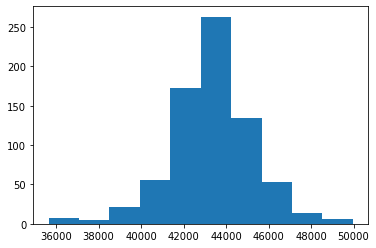

In [13]:
plt.hist(regular_data)

- From above figure we can say that our data is norally distributted

{'whiskers': [<matplotlib.lines.Line2D at 0x15ca5c1a220>,
 'caps': [<matplotlib.lines.Line2D at 0x15ca5c1a8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15ca5c0de80>],
 'medians': [<matplotlib.lines.Line2D at 0x15ca5c1afa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15ca5c27340>],
 'means': []}

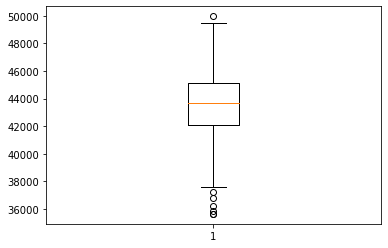

In [14]:
plt.boxplot(data.Gold_Price.loc['2020-03-04':'2021-03-04'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15ca5c822e0>,
 'caps': [<matplotlib.lines.Line2D at 0x15ca5c829a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15ca5c74f40>],
 'medians': [<matplotlib.lines.Line2D at 0x15ca5c8d0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15ca5c8d400>],
 'means': []}

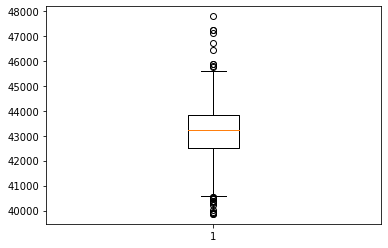

In [15]:
plt.boxplot(data.Gold_Price.loc['2021-03-04':'2022-03-04'])

- IF WE CHECK THE YEARLY DATA THERE ARE OUTLIERES IN OUR DATA .

- Lag-Plot :-

In [16]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

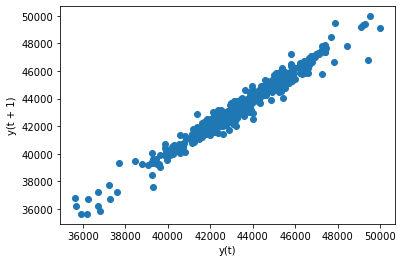

In [17]:
lag_plot(regular_data, lag=1)  # we can give any values to the lag to check the correlation 

#### Auto-Correlation Plot (ACF) :-

In [18]:
# it is used to check which lag should be taken for consideration 

from statsmodels.graphics import tsaplots

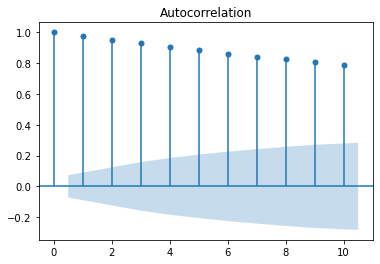

In [19]:
tsaplots.plot_acf(regular_data.Gold_Price, lags=10)
plt.show()

#### PACF plot :-

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

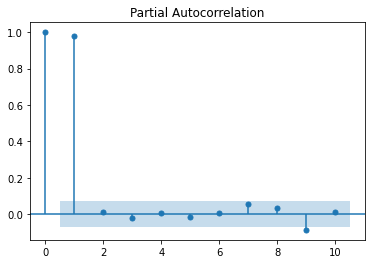

In [21]:
plot_pacf(regular_data.Gold_Price, lags=10)
plt.show()

In [22]:
regular_data.head()

,Gold_Price
Date,
2020-03-04,38782.0
2020-03-05,39246.0
2020-03-06,40061.0
2020-03-07,40031.0
2020-03-08,40001.0


### Smoothing our graph using moving averages :-

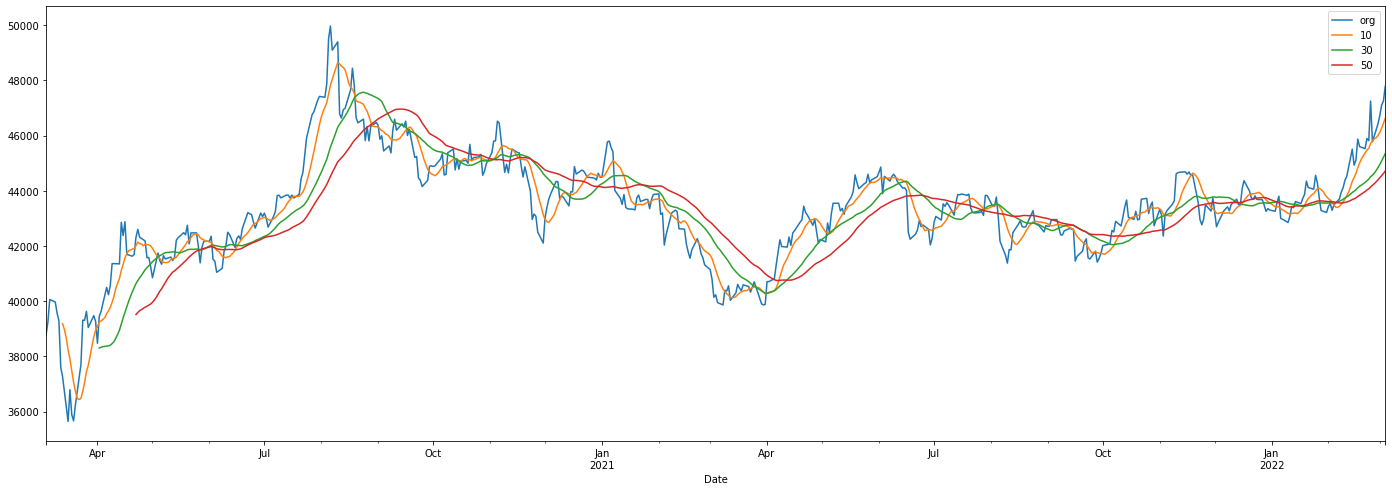

In [23]:
plt.figure(figsize=(24,8))

regular_data.Gold_Price.plot(label='org')

for i in range(10,61,20):
    regular_data['Gold_Price'].rolling(i).mean().plot(label=i)
    
plt.legend()

### Time series Decomposition plot :-

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-25-27f403a9c3a2>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_plot = seasonal_decompose(regular_data.Gold_Price, freq=30)


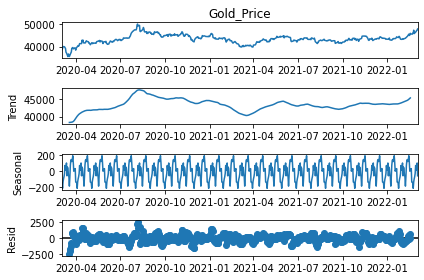

In [25]:
decompose_plot = seasonal_decompose(regular_data.Gold_Price, freq=30)
decompose_plot.plot()
plt.show()

### Feature Engineering :-

In [26]:
regular_data

,Gold_Price
Date,
2020-03-04,38782.0
2020-03-05,39246.0
2020-03-06,40061.0
2020-03-07,40031.0
2020-03-08,40001.0
...,...
2022-02-28,46420.0
2022-03-01,46715.0
2022-03-02,47102.0


In [27]:
t= np.arange(1,732)
regular_data['t']=t
regular_data['t_square']=regular_data['t']*regular_data['t']

log_gold = np.log(regular_data.Gold_Price)
regular_data['log_gold'] = log_gold

In [28]:
regular_data['month'] = pd.DatetimeIndex(regular_data.index).month
regular_data['month'] = regular_data['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                      ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))


In [29]:
new_data = pd.get_dummies(regular_data,   prefix='',   prefix_sep='',   columns=['month'])
new_data.head()

,Gold_Price,t,t_square,log_gold,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,
2020-03-04,38782.0,1,1,10.565712,0,0,0,0,0,0,0,1,0,0,0,0
2020-03-05,39246.0,2,4,10.577605,0,0,0,0,0,0,0,1,0,0,0,0
2020-03-06,40061.0,3,9,10.598159,0,0,0,0,0,0,0,1,0,0,0,0
2020-03-07,40031.0,4,16,10.597409,0,0,0,0,0,0,0,1,0,0,0,0
2020-03-08,40001.0,5,25,10.596660,0,0,0,0,0,0,0,1,0,0,0,0


### Splitting the data in to train and test :-

In [30]:
train_data = new_data.head(550)

In [31]:
test_data = new_data.tail(181)


## We will perform all types of models:- 

## Model Based Approach :-

### 1. Linear Model :-

In [32]:
import statsmodels.formula.api as smf

In [33]:
model1 = smf.ols('Gold_Price~t', data=train_data).fit()

In [34]:
linear_pred = model1.predict(test_data['t'])

In [35]:
def MAPE(actual, predict):
    value = np.mean(np.abs((actual-predict)/actual)*100)
    return value

In [36]:
MAPE_linear = MAPE(test_data['Gold_Price'],linear_pred)
MAPE_linear

1.9465906732671232

### 2.Exponential Model :-

In [37]:
model2 = smf.ols('log_gold~t', data=train_data).fit()

In [38]:
expo_pred = np.exp(model2.predict(test_data['t']))

In [39]:
MAPE_expo = MAPE(test_data['Gold_Price'], expo_pred)
MAPE_expo

1.9749749741524163

### 3.Quadratic Model :-

In [40]:
model3 = smf.ols('Gold_Price~t+t_square', data=train_data).fit()

In [41]:
quad_pred = model3.predict(test_data[['t','t_square']])

In [42]:
MAPE_quad = MAPE(test_data['Gold_Price'], quad_pred)
MAPE_quad

12.085338102857227

### 4.Additive Seasonality :-

In [43]:
model4 = smf.ols('Gold_Price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data= train_data).fit()

In [44]:
add_seas_pred = model4.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

In [45]:
MAPE_add_seas = MAPE(test_data['Gold_Price'],add_seas_pred)
MAPE_add_seas

3.9800376650444

### 5.Additive Seasonality Quadratic Model :-

In [46]:
model5 = smf.ols('Gold_Price~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train_data).fit()

In [47]:
add_seas_quad_pred = model5.predict(test_data[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

In [48]:
MAPE_add_seas_quad = MAPE(test_data['Gold_Price'],add_seas_quad_pred)
MAPE_add_seas_quad

13.943434669147683

### 6.Multiplicative Seasonality Model :-

In [49]:
model6 = smf.ols('log_gold~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train_data).fit()

In [50]:
mul_seas_pred = np.exp(model6.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

In [51]:
MAPE_mul_seas = MAPE(test_data['Gold_Price'],mul_seas_pred)
MAPE_mul_seas

3.9722855982333005

In [52]:
MAPE_values1 = {
            'Model': pd.Series(['Linear','Exponential','Quadratic','Additive seasonality','Additive seasonality quadratic',
                                  'Multiplicative seasonality']),
            'MAPE_VALUE': ([MAPE_linear, MAPE_expo, MAPE_quad, MAPE_add_seas, MAPE_add_seas_quad, MAPE_mul_seas ])
              }


In [53]:
MAPE_table1 = pd.DataFrame(MAPE_values1)


In [54]:
MAPE_table1.sort_values(['MAPE_VALUE'])

,Model,MAPE_VALUE
0,Linear,1.946591
1,Exponential,1.974975
5,Multiplicative seasonality,3.972286
3,Additive seasonality,3.980038
2,Quadratic,12.085338
4,Additive seasonality quadratic,13.943435


# -----------------------------------------------------------------------------------------------------------

## Data Driven Approach :-

### 1. Simple Exponential Smoothing Method :-

In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [56]:
model7 = SimpleExpSmoothing (train_data['Gold_Price']).fit()

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [57]:
simple_expo_pred = model7.predict(start=test_data.index[0], end=test_data.index[-1])

In [58]:
MAPE_simple_expo = MAPE(test_data['Gold_Price'], simple_expo_pred)
MAPE_simple_expo

2.1338260610117494

### 2. Double Exponential  Smoothing Method  /  Holt Method  :-

In [59]:
from statsmodels.tsa.holtwinters import Holt

In [60]:
model8 = Holt(train_data['Gold_Price']).fit()

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
holt_pred = model8.predict(start = test_data.index[0], end=test_data.index[-1])

In [62]:
MAPE_holt = MAPE(test_data['Gold_Price'],holt_pred)
MAPE_holt

2.470580044953764

### 3. Holt Winter's exponential smoothing with additive seasonality and additive trend :-

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
model9 = ExponentialSmoothing(train_data['Gold_Price'], seasonal = 'add', trend='add', seasonal_periods=12).fit()

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [65]:
hw_add_seas_add_tren_pred = model9.predict(start = test_data.index[0], end=test_data.index[-1])

In [66]:
MAPE_hw_add_seas_add_tren = MAPE(test_data['Gold_Price'],hw_add_seas_add_tren_pred)
MAPE_hw_add_seas_add_tren

3.552499906715058

### 4. Holt Winter's exponential smoothing with multiplicative seasonality and additive trend :- 

In [67]:
model10 = ExponentialSmoothing(train_data['Gold_Price'], seasonal = 'mul', trend='add', seasonal_periods=12).fit()

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
hw_mul_seas_add_tren_pred = model10.predict(start = test_data.index[0], end=test_data.index[-1])

In [69]:
MAPE_hw_mul_seas_add_tren = MAPE(test_data['Gold_Price'],hw_mul_seas_add_tren_pred)
MAPE_hw_mul_seas_add_tren

3.6881362667903472

In [70]:
MAPE_values2 = {
            'Model': pd.Series(['Simple Exponential Smoothing', 'Double Exponential Smoothing',
                                "Holt Winter's exponential smoothing with additive seasonality and additive trend",
                                "Holt Winter's exponential smoothing with multiplicative seasonality and additive trend"
                               ]),
            'MAPE_VALUE': ([ MAPE_simple_expo, MAPE_holt, MAPE_hw_add_seas_add_tren, MAPE_hw_mul_seas_add_tren])
              }


In [71]:
MAPE_table2 = pd.DataFrame(MAPE_values2)

In [72]:
MAPE_table2.sort_values('MAPE_VALUE')

,Model,MAPE_VALUE
0,Simple Exponential Smoothing,2.133826
1,Double Exponential Smoothing,2.470580
2,Holt Winter's exponential smoothing with addit...,3.552500
3,Holt Winter's exponential smoothing with multi...,3.688136


# -----------------------------------------------------------------------------------------------------------

### ARIMA MODEL :-

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [74]:

def evalaute_arima_model(X, arima_order):
    X = X.astype('float32')
    train_size = int(len(X)* 0.75)
    train = X[:train_size]
    test = X[train_size:]
    
    # NOW BUILD THE MODEL :-
    
    model11 = ARIMA(train, order=arima_order).fit()
    pred = model11.forecast(len(test))
    
    mape = np.mean(np.abs((test-pred)/test)*100)
    
    return mape

In [75]:
# HYPER-PARAMETER TUNNING FOR P,D,Q VALUES :-

In [76]:
def evaluate_model (data, p_values, d_values, q_values):
    data = data.astype('float32')
    
    best_score, best_cfg = float('inf'), None 
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try :
                    mape = evaluate_arima_model(data,order)
                    if mape < best_score :
                        best_score, best_cfg = mape, order
                    print('ARIMA_ORDER {}'.format(order), 'MAPE {}'.format(mape))
                        
                except :
                    continue
    print('ARIMA_ORDER {}'.format(best_cfg), 'MAPE {}'.format(best_score))

In [77]:
p_values = range(1,6)
d_values = range(1,3)
q_values = range(1,6)
warnings.filterwarnings("ignore")

evaluate_model(data.values, p_values, d_values, q_values)

ARIMA_ORDER None MAPE inf


##### From above we get the p, d, q values as [ 4, 2, 5 ]

In [78]:
model11 = ARIMA(train_data['Gold_Price'], order=(4,2,5)).fit()
prediction = model11.forecast(181)

In [79]:
# MAPE VALUE USING ARIMA MODEL :-

In [80]:
MAPE_ARIMA = MAPE(test_data['Gold_Price'], prediction)
MAPE_ARIMA

2.0170991306622543

In [81]:
MAPE_values = {
            'Model': pd.Series(['Linear','Exponential','Quadratic','Additive seasonality','Additive seasonality quadratic',
                                  'Multiplicative seasonality','ARIMA',
                               'Simple Exponential Smoothing', 'Double Exponential Smoothing',
                                "Holt Winter's exponential smoothing with additive seasonality and additive trend",
                                "Holt Winter's exponential smoothing with multiplicative seasonality and additive trend"]),
            'MAPE_VALUE': ([MAPE_linear, MAPE_expo, MAPE_quad, MAPE_add_seas, MAPE_add_seas_quad, MAPE_mul_seas , MAPE_ARIMA,
                           MAPE_simple_expo, MAPE_holt, MAPE_hw_add_seas_add_tren, MAPE_hw_mul_seas_add_tren])
              }


In [83]:
MAPE_TABLE = pd.DataFrame(MAPE_values)
MAPE_TABLE.sort_values('MAPE_VALUE')

,Model,MAPE_VALUE
0,Linear,1.946591
1,Exponential,1.974975
6,ARIMA,2.017099
7,Simple Exponential Smoothing,2.133826
8,Double Exponential Smoothing,2.470580
9,Holt Winter's exponential smoothing with addit...,3.552500
10,Holt Winter's exponential smoothing with multi...,3.688136
5,Multiplicative seasonality,3.972286
3,Additive seasonality,3.980038
2,Quadratic,12.085338


### As we can see from above table the the lowest mape value is given by linear model so we will build the final model on "Linear Model ".

In [122]:
final_model = smf.ols('Gold_Price~t', data=train_data).fit()

<AxesSubplot:>

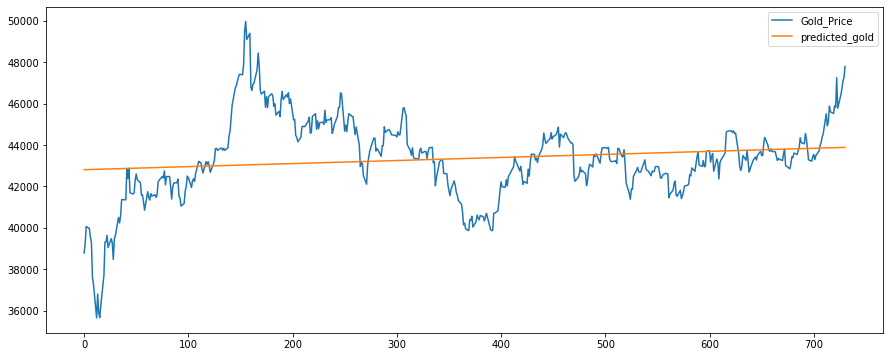

In [151]:
pred =final_model.predict(new_data)
new_data ['predicted_gold'] = pd.Series(pred)
new_data[['Gold_Price','predicted_gold']].reset_index(drop=True).plot(figsize=(15,6))

In [123]:
predict_data = pd.read_csv("C:\\Users\\RUSHIKESH\\OneDrive\\Desktop\\predict.csv")
predict_data

,t
0,732
1,733
2,734
3,735
4,736
5,737
6,738
7,739
8,740
9,741


### we have to predict the gold prices for above time .

In [124]:
prediction = (final_model.predict(predict_data))      
prediction

0     43886.817066
1     43888.293624
2     43889.770181
3     43891.246739
4     43892.723297
5     43894.199854
6     43895.676412
7     43897.152970
8     43898.629527
9     43900.106085
10    43901.582643
11    43903.059201
12    43904.535758
13    43906.012316
14    43907.488874
15    43908.965431
16    43910.441989
17    43911.918547
18    43913.395104
19    43914.871662
20    43916.348220
21    43917.824777
22    43919.301335
23    43920.777893
24    43922.254450
25    43923.731008
26    43925.207566
27    43926.684123
28    43928.160681
29    43929.637239
dtype: float64

In [125]:
predict_data['Forecasted_goldprice'] = pd.Series(prediction)

In [126]:
predict_data

,t,Forecasted_goldprice
0,732,43886.817066
1,733,43888.293624
2,734,43889.770181
3,735,43891.246739
4,736,43892.723297
5,737,43894.199854
6,738,43895.676412
7,739,43897.152970
8,740,43898.629527
9,741,43900.106085


### Above are the predicted values for next 30days of gold prices per 10 grams.

In [127]:
latest_data = pd.concat([new_data,predict_data])


<AxesSubplot:>

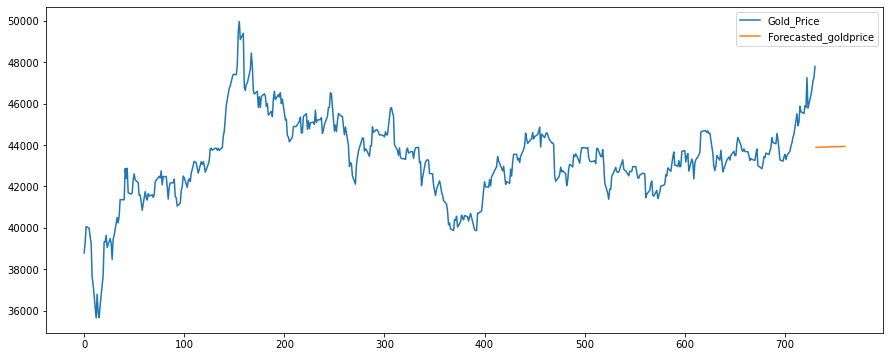

In [128]:
latest_data[['Gold_Price','Forecasted_goldprice']].reset_index(drop=True).plot(figsize=(15,6))